1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и 
сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
2. Загрузите датасет в pandas DataFrame под названием df.
3. Выполните предварительную обработку данных, выполнив следующие шаги:\
    a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).\
    b. Проверьте и обработайте любые дублирующиеся строки в датасете.\
    c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).
4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:\
    a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?\
    b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?\
    c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.\
    d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
5. Выполните проектирование признаков путем реализации следующих преобразований:\
    a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.\
    b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

<a href=#your-anchor>Это ссылка на якорь</a>

In [239]:
import numpy as  np
import pandas as pd
import os
import sys
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [240]:
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [242]:
# В датасете 38 числовых колонок. По факту часть из них являются категориальными переменными.
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [243]:
# Столбцы, имеющие пропуски и доля пропущенных значений
df_row_count = len(df.index)
df_col_count = df.shape[1]
print(df[df.columns[df.isnull().any()].to_list()].isnull().sum()/df_row_count)

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


### 3.a Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями)

#### Анализ существующих признаков и определение способов работы с пропусками для каждого признака в отдельном файле

In [244]:
# Числовые переменные в которых нужно заполнить пропуски
col_name_with_missing_nimeric_data = [
    {'name': 'LotFrontage', 'method': 'median'},
    {'name': 'Electrical', 'method': 'mode'},
    ]

In [245]:
# Маркер категориальной переменной не имеющей смысла для данной записи
NO_VALUE_MARKER = 'None'

# Колонки с категориальными переменными пропуски в которых нужно заполнить специальным маркером
col_name_with_missing_categorical_data = [
    {'name': 'Alley', 'marker': NO_VALUE_MARKER},
    {'name': 'Fence', 'marker': NO_VALUE_MARKER},
    {'name': 'MiscFeature', 'marker': NO_VALUE_MARKER},
    ]

In [246]:
# Колонки с категориальными переменными которые в последующем нужно закодировать методом one-hot encoding
col_name_with_categorical_data_to_one_hot_encoding = [
    {'name' : 'MSZoning',},
    {'name' : 'Street',},
    {'name': 'Alley',},
    {'name': 'LotShape',},
    {'name': 'LandContour',},
    {'name': 'Utilities',},
    {'name': 'LotConfig',},
    {'name': 'LandSlope',},
    {'name': 'Neighborhood',},
    {'name': 'Condition1',},
    {'name': 'Condition2',},
    {'name': 'BldgType',},
    {'name': 'HouseStyle',},
    {'name': 'RoofStyle',},
    {'name': 'RoofMatl',},
    {'name': 'Exterior1st',},
    {'name': 'Exterior2nd',},
    {'name': 'MasVnrType',},
    {'name': 'ExterQual',},
    {'name': 'ExterCond',},
    {'name': 'Foundation',},
    {'name': 'Heating',},
    {'name': 'HeatingQC',},
    {'name': 'CentralAir',},
    {'name': 'KitchenQual',},
    {'name': 'Functional',},
    {'name': 'PavedDrive',},
    {'name': 'Fence',},
    {'name': 'SaleCondition',},
    {'name': 'MiscFeature',},
    ]

In [247]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [248]:
# Год месяц постройки закодируем через возраст в годах относительно 2100 года. 'construction_age'
df['YearBuilt'].apply(lambda x: 2100 - x)


0        97
1       124
2        99
3       185
4       100
       ... 
1455    101
1456    122
1457    159
1458    150
1459    135
Name: YearBuilt, Length: 1460, dtype: int64

In [249]:
# Год реконструкции закодируем через возраст в годах относительно 2100 года. 'reconstruction_age'
df['YearRemodAdd'].apply(lambda x: 2100 - x)

0        97
1       124
2        98
3       130
4       100
       ... 
1455    100
1456    112
1457     94
1458    104
1459    135
Name: YearRemodAdd, Length: 1460, dtype: int64

In [250]:
# Обработаем заполнение пропусков в полях MasVnrType, MasVnrArea
# 1. Одновременные пропуски в полях MasVnrType, MasVnrArea будем заполнять наиболее часто встречающимся значением 
# MasVnrType и соответствующим ему значением MasVnrArea
# 2. Отсутствующее значение в поле MasVnrType сначала попытаемся заполнить значением MasVnrType, определенным как наиболее близкое значение
# между значением MasVnrArea и медианным значением MasVnrArea в групее по MasVnrType
# 3. Отсутствующее значение в поле MasVnrArea заполним по медианным значением MasVnrArea определенным в группе по MasVnrType
df_mas_vnr_area_mdeian = \
df.loc[(df['MasVnrType'].notna()) & (df['MasVnrArea'].notna())].groupby(by='MasVnrType')\
    .agg({'MasVnrType': 'count', 'MasVnrArea': 'median'})\
    .rename(columns={'MasVnrType': 'count', 'MasVnrArea': 'MasVnrArea_median'}).reset_index().sort_values(by='count', ascending=False)
df_mas_vnr_area_mdeian

,MasVnrType,count,MasVnrArea_median
2,None,864,0.0
1,BrkFace,445,202.0
3,Stone,128,206.5
0,BrkCmn,15,192.0


In [251]:
mas_vnr_type_isna_cond = \
df['MasVnrType'].isna()

mas_vnr_area_isna_cond = \
df['MasVnrArea'].isna()

mas_vnr_area_iszero_cond = \
df['MasVnrArea'] == 0
print(mas_vnr_type_isna_cond.value_counts(),
        mas_vnr_area_isna_cond.value_counts(),      
        mas_vnr_area_iszero_cond.value_counts())


False    1452
True        8
Name: MasVnrType, dtype: int64 False    1452
True        8
Name: MasVnrArea, dtype: int64 True     861
False    599
Name: MasVnrArea, dtype: int64


In [252]:
# df_copy = df.copy()
# df_mas_vnr_area_mdeian.iloc[0][['MasVnrType', 'MasVnrArea_median']]
# df_mas_vnr_area_mdeian.loc['MasVnrType', 'MasVnrArea_median']

In [253]:
df.loc[mas_vnr_type_isna_cond & mas_vnr_area_isna_cond, ['MasVnrType']] = df_mas_vnr_area_mdeian.iloc[0]['MasVnrType']
df.loc[mas_vnr_type_isna_cond & mas_vnr_area_isna_cond, ['MasVnrArea']] = df_mas_vnr_area_mdeian.iloc[0]['MasVnrArea_median']
# Так не работает
# df_copy.loc[mas_vnr_type_isna_cond & mas_vnr_area_isna_cond, ['MasVnrType', 'MasVnrArea']] = \
#     df_mas_vnr_area_mdeian.iloc[0][['MasVnrType', 'MasVnrArea_median']]

In [254]:
# df[mas_vnr_type_isna_cond][['MasVnrType', 'MasVnrArea']]
df.loc[df['MasVnrArea'] == 1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
773,774,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000


In [255]:
print(f"Количество пропусков в поле MasVnrType {df.loc[df['MasVnrType'].isna()].shape[0]},\n" 
      f"Количество пропусков в поле MasVnrArea {df.loc[df['MasVnrArea'].isna()].shape[0]}")

Количество пропусков в поле MasVnrType 0,
Количество пропусков в поле MasVnrArea 0


In [256]:
# Записи с ненулевой площадью отделки, но не определенным материалом отделки
# Для этих записей оставим как есть, т.к. несмотря на несогласованность данных их мало и они не влияют на основной датасет
df.loc[(df['MasVnrType'] == 'None') & (df['MasVnrArea'] != 0)][['MasVnrType', 'MasVnrArea']]#.shape[0]

,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0


In [257]:
# Обработаем пропуски для характеристик подвала с учетом.
# Подвалы есть не у всех объектов. Пропуски будем обрабатывать только для тех объектов укоторых есть подвал.
# Для записей, с отсутствующим подвалом введем специальный маркер отсутствия подвала . 
# Далее признаки, характеризующие подвал закодируем через one-hot encoding. 
# Записи не имеющие подвала, будет иметь нулевые значения во всех признаках не имеющих подвала NoBasement = 1.
# Записи, не имеющие подвала определяются по нулевой площади подвала df.loc[df['TotalBsmtSF'] == 0]. 
bsmt_is_not_exists_cond = df['TotalBsmtSF'] == 0
bsmt_is_not_exists_cond.value_counts()

False    1423
True       37
Name: TotalBsmtSF, dtype: int64

In [258]:
# Зададим список категориальных признаков характеризующих подвал
bsmt_categorical_col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',]

In [259]:
no_bsmnt_marker_col_name = 'NoBsmt'
if no_bsmnt_marker_col_name in df.columns:
    df.drop(columns=no_bsmnt_marker_col_name, inplace=True)
df[no_bsmnt_marker_col_name] = \
    df['TotalBsmtSF'].apply(lambda x: 0 if x > 0 else 1)
df[no_bsmnt_marker_col_name].value_counts()

0    1423
1      37
Name: NoBsmt, dtype: int64

In [260]:
# в некоторых категориальных признаках есть пропуски для записей с наличием подвала. 
# Заполним эти пропуски часто встречающимся значением признка.
for col_name in bsmt_categorical_col:
    if df.loc[(~bsmt_is_not_exists_cond) & (df[col_name].isna())].shape[0] > 0:
        col_mode = df[col_name].mode().values[0]
        df.loc[(~bsmt_is_not_exists_cond) & (df[col_name].isna()), col_name] = col_mode
    if df.loc[(bsmt_is_not_exists_cond) & (df[col_name].isna())].shape[0] >0 :
        df.loc[(bsmt_is_not_exists_cond) & (df[col_name].isna()), col_name] = NO_VALUE_MARKER

In [261]:
# Обработаем пропуски для характеристик камина с учетом.
# Камины есть не у всех объектов. Пропуски будем обрабатывать только для тех объектов укоторых есть камины.
# Для записей, с отсутствующим камином введем специальный маркер отсутствия камина. 
# Далее признаки, характеризующие камин закодируем через one-hot encoding. 
# Записи не имеющие камина, буду иметь нулевые значения во всех признаках не имеющих камина NoFireplaces = 1.
# Записи, не имеющие камина определяются по нулевму количеству каминов df.loc[df['Fireplaces'] == 0]. 
fireplaces_is_not_exists_cond = df['Fireplaces'] == 0
fireplaces_is_not_exists_cond.value_counts()  

False    770
True     690
Name: Fireplaces, dtype: int64

In [262]:
no_fireplacesmarker_col_name = 'NoFireplaces'
if no_fireplacesmarker_col_name in df.columns:
    df.drop(columns=no_fireplacesmarker_col_name, inplace=True)
df[no_fireplacesmarker_col_name] = \
    df['Fireplaces'].apply(lambda x: 0 if x > 0 else 1)
df[no_fireplacesmarker_col_name].value_counts()

0    770
1    690
Name: NoFireplaces, dtype: int64

In [263]:
frplc_categorical_col = ['FireplaceQu']
# Проверка
# df.loc[(~fireplaces_is_not_exists_cond) & (df[frplc_categorical_col[0]].isna())]
for col_name in frplc_categorical_col:
    if df.loc[(~fireplaces_is_not_exists_cond) & (df[col_name].isna())].shape[0] > 0:
        col_mode = df[col_name].mode().values[0]
        df.loc[(~fireplaces_is_not_exists_cond) & (df[col_name].isna()), col_name] = col_mode
    if df.loc[(fireplaces_is_not_exists_cond) & (df[col_name].isna())].shape[0] > 0:
        df.loc[(fireplaces_is_not_exists_cond) & (df[col_name].isna()), col_name] = NO_VALUE_MARKER
    

In [264]:
# Обработаем пропуски для характеристик гаража с учетом.
# Гаражи есть не у всех объектов. Пропуски будем обрабатывать только для тех объектов укоторых есть гараж.
# Для записей, с отсутствующим гаражом введем специальный маркер отсутствия гаража. 
# Далее признаки, характеризующие гараж закодируем через one-hot encoding. 
# Записи не имеющие гаража, буду иметь нулевые значения во всех записях не имеющих гараж Nogarage = 1.
# Записи, не имеющие гаража определяются по нулевму количеству площади df.loc[df['GarageArea'] == 0]. 
garage_is_not_exists_cond = df['GarageArea'] == 0
garage_is_not_exists_cond.value_counts()  

False    1379
True       81
Name: GarageArea, dtype: int64

In [265]:
no_garage_marker_col_name = 'NoGarage'
if no_garage_marker_col_name in df.columns:
    df.drop(columns=no_garage_marker_col_name, inplace=True)
df[no_garage_marker_col_name] = \
    df['GarageArea'].apply(lambda x: 0 if x > 0 else 1)
df[no_garage_marker_col_name].value_counts()

0    1379
1      81
Name: NoGarage, dtype: int64

In [266]:
garage_categorical_col = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',]
# Проверка
# df.loc[(~fireplaces_is_not_exists_cond) & (df[frplc_categorical_col[0]].isna())]
for col_name in garage_categorical_col:
    if df.loc[(~garage_is_not_exists_cond) & (df[col_name].isna())].shape[0] > 0:
        col_mode = df[col_name].mode().values[0]
        df.loc[(~garage_is_not_exists_cond) & (df[col_name].isna()), col_name] = col_mode
    if df.loc[(garage_is_not_exists_cond) & (df[col_name].isna())].shape[0] > 0:
        df.loc[(garage_is_not_exists_cond) & (df[col_name].isna()), col_name] = NO_VALUE_MARKER

In [267]:
# Обработаем пропуски для характеристик бассейна с учетом.
# Бассейн есть не у всех объектов. Пропуски будем обрабатывать только для тех объектов укоторых есть бассейн.
# Для записей, с отсутствующим бассейном введем специальный маркер отсутствия бассейна. 
# Далее признаки, характеризующие бассейн закодируем через one-hot encoding. 
# Записи не имеющие бассейн, буду иметь нулевые значения во всех записях не имеющих бассейн NoPool = 1.
# Записи, не имеющие бассейн определяются по нулевму количеству площади  df.loc[df['PoolArea'] == 0]. 
pool_is_not_exists_cond = df['PoolArea'] == 0
pool_is_not_exists_cond.value_counts()  

True     1453
False       7
Name: PoolArea, dtype: int64

In [268]:
no_pool_marker_col_name = 'NoPool'
if no_pool_marker_col_name in df.columns:
    df.drop(columns=no_pool_marker_col_name, inplace=True)
df[no_pool_marker_col_name] = \
    df['PoolArea'].apply(lambda x: 0 if x > 0 else 1)
df[no_pool_marker_col_name].value_counts()

1    1453
0       7
Name: NoPool, dtype: int64

In [269]:
pool_categorical_col = ['PoolQC',]
# Проверка
# df.loc[(~fireplaces_is_not_exists_cond) & (df[frplc_categorical_col[0]].isna())]
for col_name in pool_categorical_col:
    if df.loc[(~pool_is_not_exists_cond) & (df[col_name].isna())].shape[0] > 0:
        col_mode = df[col_name].mode().values[0]
        df.loc[(~pool_is_not_exists_cond) & (df[col_name].isna()), col_name] = col_mode
    if df.loc[(pool_is_not_exists_cond) & (df[col_name].isna())].shape[0] > 0:
        df.loc[(pool_is_not_exists_cond) & (df[col_name].isna()), col_name] = NO_VALUE_MARKER

In [270]:
# Обработаем пропуски для характеристик ограды с учетом.
# Ограда  есть не у всех объектов. Пропуски будем обрабатывать только для тех объектов укоторых есть ограда.
# Для записей, с отсутствующей оградой введем специальный маркер отсутствия ограды. 
# Далее признаки, характеризующие ограду закодируем через one-hot encoding. 
# Записи не имеющие ограды, буду иметь нулевые значения во всех записях не имеющих ограды Nofence = 1.
# Записи, не имеющие бассейн определяются по нулевму количеству площади  df.loc[df['Fence'].isna()]. 
# fence_is_not_exists_cond = df['Fence'].isna()
# fence_is_not_exists_cond.value_counts()

In [271]:
# no_fence_marker_col_name = 'NoFence'
# if no_fence_marker_col_name in df.columns:
#     df.drop(columns=no_fence_marker_col_name, inplace=True)
# df[no_fence_marker_col_name] = \
#     df['Fence'].apply(lambda x: 1 if x is np.NaN else 0)
# df[no_fence_marker_col_name].value_counts()

In [272]:
# # Проверка
# # df.loc[(~fireplaces_is_not_exists_cond) & (df[frplc_categorical_col[0]].isna())]
# if df.loc[(fence_is_not_exists_cond)].shape[0] > 0:
#     df.loc[(fence_is_not_exists_cond), ['Fence']] = NO_VALUE_MARKER
# df['Fence'].value_counts()

In [273]:
# # Подготовим к one-hot encoding признак MiscFeature
# misc_is_not_exists_cond = df['MiscFeature'].isna()
# misc_is_not_exists_cond.value_counts()
# if df.loc[(misc_is_not_exists_cond)].shape[0] > 0:
#     df.loc[(misc_is_not_exists_cond), ['MiscFeature']] = NO_VALUE_MARKER
# df['MiscFeature'].value_counts()

In [274]:
# Нестандартные пропуски обработали
# Обрабаботаем стандартные пропуски по словарю 
# 
for el in col_name_with_missing_categorical_data:
    if df.loc[df[el['name']].isna()].shape[0] > 0:
        df.loc[df[el['name']].isna(), el['name']] = el['marker']
    print(df[el['name']].value_counts())

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


In [275]:
for el in col_name_with_missing_nimeric_data:
    if el['method'] == 'median':
        value = df.loc[df[el['name']].notna(), el['name']].median()
    elif el['method'] == 'mode':
        value = df.loc[df[el['name']].notna(), el['name']].mode().values[0]
    print(f'{value=}')
    df.loc[df[el['name']].isna(), [el['name']]] = value
    print(f"{el['name']} {el['method']} {value} {df.loc[df[el['name']].isna()].shape[0]}")

value=69.0
LotFrontage median 69.0 0
value='SBrkr'
Electrical mode SBrkr 0


In [276]:
# проверим, что для признака Electrical нет записей, содержащих пропущенные значения
df.loc[df['Electrical']. isna(), ['Electrical']]# = 'SBrkr'
# df.loc[df['Electrical'].notna()]['Electrical'].mode().values[0]
# df.loc[df['Electrical']. isna()].shape[0]

,Electrical


In [277]:
# Определение количества нулевых и незаполненных записей для различных признаков, характеризующих подвал.
# Подробная информация о результатах анализа признаков в отдельном файле.
# 
# df.loc[df['TotalBsmtSF'] == 0, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
# df.loc[df['BsmtFinType2'].isna(), ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
# df.loc[df['TotalBsmtSF'] != 0].shape[0] # - 1423 записей
# df.loc[df['BsmtUnfSF'] != 0].shape[0] #- 1342 записей
# df.loc[df['BsmtFinSF2'] != 0].shape[0] # - 167 записей

In [278]:
# Анализ признаков, характеризующих обекты с бассейном. 
# Подробная информация о результатах анализа признаков в отдельном файле.
# 
print(f"df['PoolArea'].describe()\n{df['PoolArea'].describe()}")
print(df.loc[df['PoolArea'] != 0, ['PoolArea']])
print(df['PoolQC'].value_counts())

df['PoolArea'].describe()
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
      PoolArea
197        512
810        648
1170       576
1182       555
1298       480
1386       519
1423       738
None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


In [279]:
# Строки с нулевой площадью гаража и нулевым количеством это одни и те же строки
df.loc[(df['GarageCars'] == 0) & (df['GarageArea'] == 0 )].shape[0] 

81

In [280]:
df.loc[(df['MiscVal'] == 0) & (~df['MiscFeature'].isna())]
# df.loc[(df['MiscVal'] = 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NoBsmt,NoFireplaces,NoGarage,NoPool
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,0,1,0,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,0,0,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,0,0,0,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,0,0,0,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,10,2009,WD,Normal,185000,0,1,0,1
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,8,2007,WD,Normal,175000,0,0,0,1
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,210000,0,0,0,1
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,142125,0,1,0,1


### 3.b. Проверьте и обработайте любые дублирующиеся строки в датасете.

In [281]:
# Выявим наличие полных дубликатов с помощью встроенной функции по всем признакам датасета.
df.duplicated().value_counts() # дубликатов не выявлено.

False    1460
dtype: int64

### 3.c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

Анализ данных каждого столбца выполнен в отдельном файле.
Там же проанализирована целесообразность преобразования из объектных в числовые типы.\ Вывод: данное преобразование не целесообразно

### 4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:

#####    4. a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?

In [282]:
import matplotlib.pyplot as lpt
import seaborn as sns

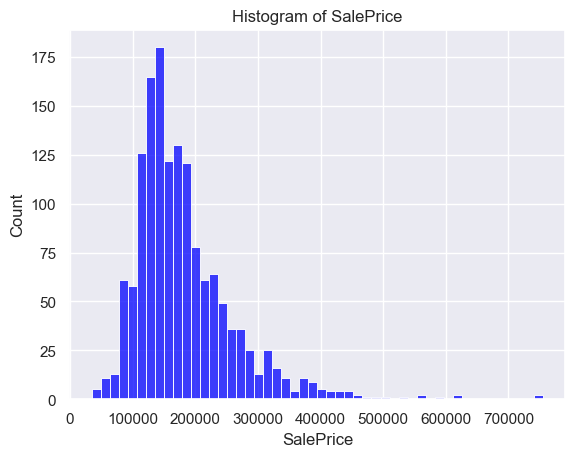

In [283]:
bins = 50
# plt.hist(df['SalePrice'], bins=bins, color='blue', edgecolor = 'black',);
sns.histplot(df['SalePrice'], bins=bins, kde=False,  color='blue')
plt.title('Histogram of SalePrice');
# plt.xlabel('SalePrice')
# plt.ylabel('Count');

<Axes: xlabel='SalePrice'>

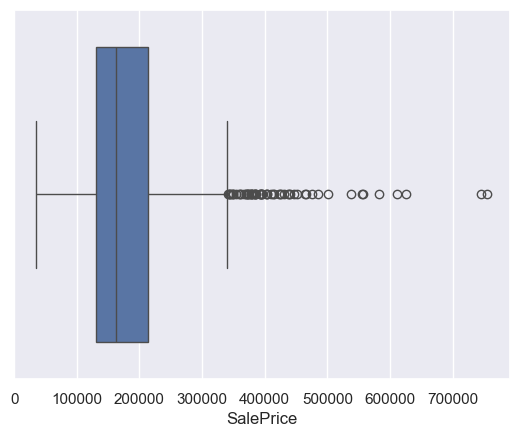

In [284]:
# Наблюдаем длинный "хвост" в области больших значений целевой переменной. 
# По имеющимся данным сложно определить являются ли эти значения выбросами или объекты действительно обладают исключительными свойствами.
# Например самые дорогие объекты имеют бассейн, а другой значительную площадь объекта.
# Не будем считать это выбросами, будем считать индивидуальными особенностями объекта
sns.boxplot(x=df['SalePrice'])

In [285]:
# Отобразим объекты значения целевой переменной для которых выходит за интерквартильный размах.
# Всего таких значений 54, что составляет ~3% от объема выборки
df.loc[df['SalePrice'] > 350_000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NoBsmt,NoFireplaces,NoGarage,NoPool
53,54,20,RL,68.0,50271,Pave,None,IR1,Low,AllPub,...,0,11,2006,WD,Normal,385000,0,0,0,1
58,59,60,RL,66.0,13682,Pave,None,IR2,HLS,AllPub,...,0,10,2006,New,Partial,438780,0,0,0,1
112,113,60,RL,77.0,9965,Pave,None,Reg,Lvl,AllPub,...,0,10,2007,New,Partial,383970,0,0,0,1
151,152,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,...,0,1,2008,New,Partial,372402,0,0,0,1
161,162,60,RL,110.0,13688,Pave,None,IR1,Lvl,AllPub,...,0,3,2008,WD,Normal,412500,0,0,0,1
178,179,20,RL,63.0,17423,Pave,None,IR1,Lvl,AllPub,...,0,7,2009,New,Partial,501837,0,0,0,1
185,186,75,RM,90.0,22950,Pave,None,IR2,Lvl,AllPub,...,0,6,2006,WD,Normal,475000,0,0,0,1
224,225,20,RL,103.0,13472,Pave,None,Reg,Lvl,AllPub,...,0,6,2009,WD,Normal,386250,0,0,0,1
231,232,60,RL,174.0,15138,Pave,None,IR1,Lvl,AllPub,...,0,7,2009,WD,Normal,403000,0,0,0,1
278,279,20,RL,107.0,14450,Pave,None,Reg,Lvl,AllPub,...,0,5,2007,New,Partial,415298,0,0,0,1


##### 4. b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?

<Axes: xlabel='LotArea', ylabel='SalePrice'>

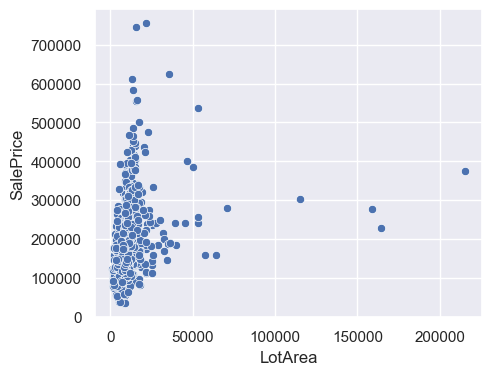

In [286]:
fig = plt.gcf()
fig.set_size_inches(5, 4)
sns.scatterplot(data=df, x="LotArea", y="SalePrice")
# Есть зависимость меожу площадью объекта и стоимостью

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

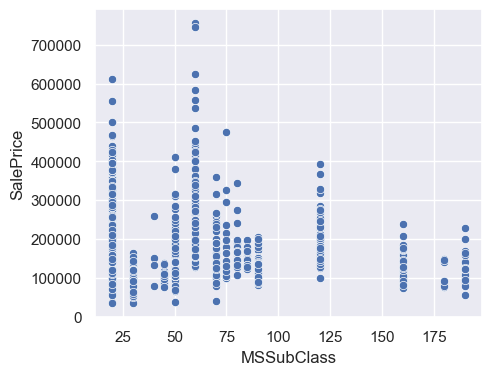

In [287]:
fig = plt.gcf()
fig.set_size_inches(5, 4)
sns.scatterplot(data=df, x="MSSubClass", y="SalePrice")
# Нет явной корреляции между классом строительства и стоимостью объекта.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

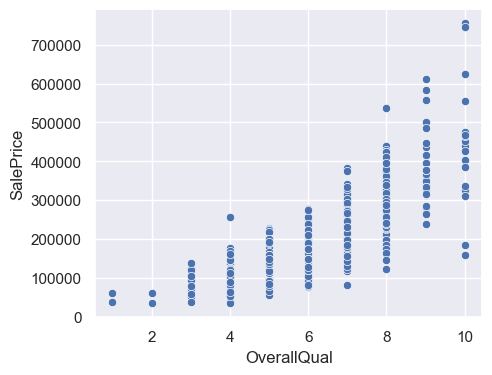

In [288]:
fig = plt.gcf()
fig.set_size_inches(5, 4)
sns.scatterplot(data=df, x="OverallQual", y="SalePrice")
# Есть прямая зависимость между общим качеством отделки и стоимостью

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

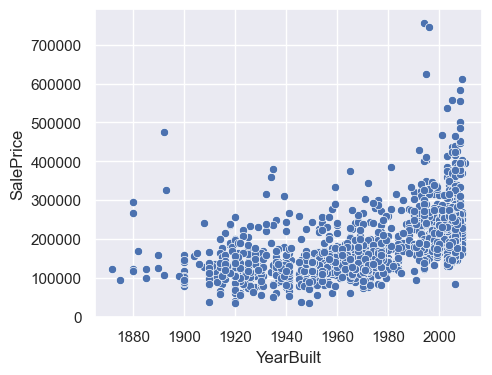

In [289]:
fig = plt.gcf()
fig.set_size_inches(5, 4)
sns.scatterplot(data=df, x="YearBuilt", y="SalePrice")
# Есть прямая зависимость между годом постройки и стоимостью

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

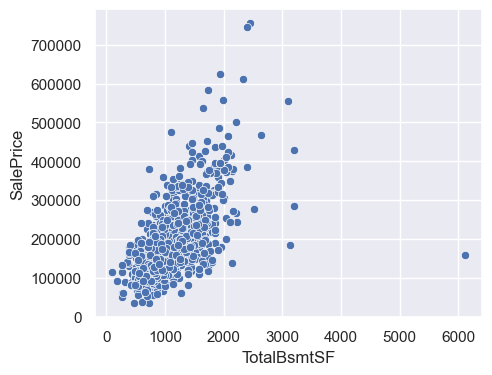

In [290]:
fig = plt.gcf()
fig.set_size_inches(5, 4)
sns.scatterplot(data=df.loc[df['TotalBsmtSF'] > 0], x="TotalBsmtSF", y="SalePrice")
# Есть прямая зависимость между площадью подвала и тоимостью

##### 4.c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.

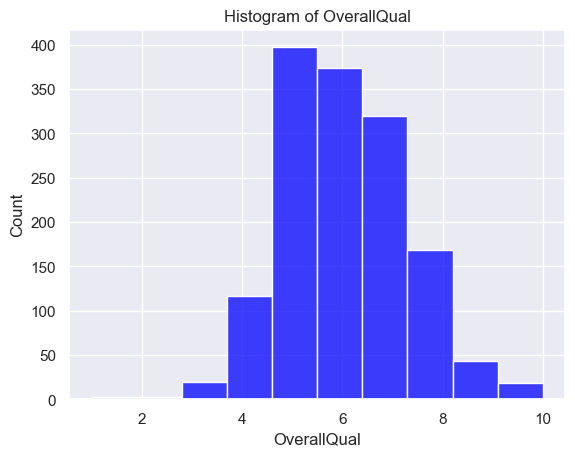

In [291]:
col_name = 'OverallQual'
bins = df[col_name].nunique()
sns.histplot(df[col_name], bins=bins, kde=False,  color='blue')
plt.title(f'Histogram of {col_name}');

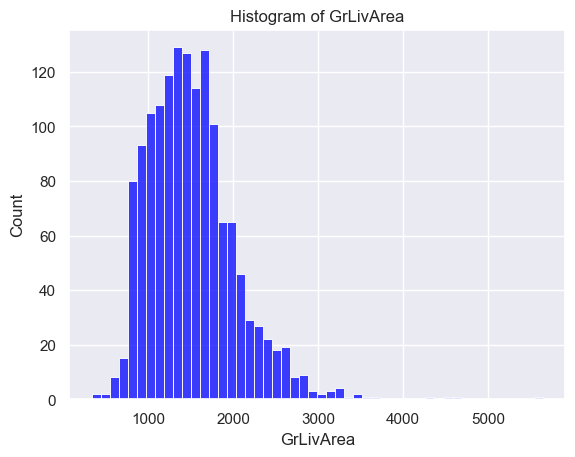

In [292]:
col_name = 'GrLivArea'
bins = 50
sns.histplot(df[col_name], bins=bins, kde=False,  color='blue')
plt.title(f'Histogram of {col_name}');


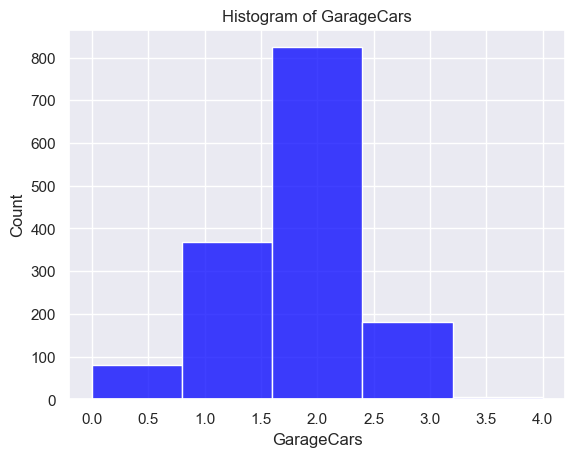

In [293]:
col_name = 'GarageCars'
bins = df[col_name].nunique()
sns.histplot(df[col_name], bins=bins, kde=False,  color='blue')
plt.title(f'Histogram of {col_name}');

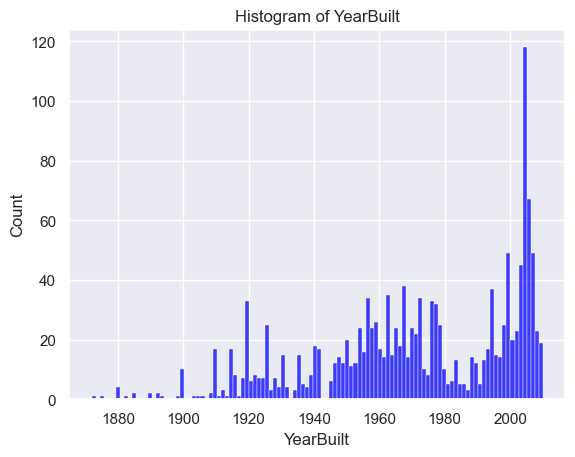

In [295]:
col_name = 'YearBuilt'
bins = df[col_name].nunique()
sns.histplot(df[col_name], bins=bins, kde=False,  color='blue')
plt.title(f'Histogram of {col_name}');

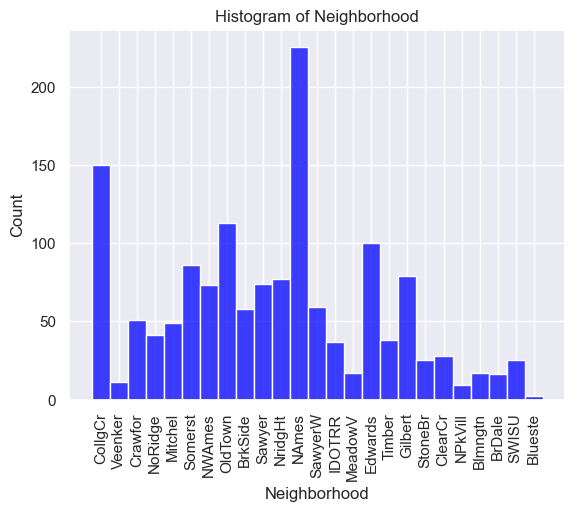

In [296]:
col_name = 'Neighborhood'
bins = df[col_name].nunique()
sns.histplot(df[col_name], bins=bins, kde=False,  color='blue')
plt.title(f'Histogram of {col_name}')
plt.xticks(rotation=90);

In [297]:
# col_name_list_categorical_for_hist = ['MSSubClass', 'MSZoning', 'OverallQual', 'GarageCars','Neighborhood']#, 'Condition1', 'BldgType', 'HouseStyle', 'YearBuilt']
# df[col_name_list_categorical_for_hist].hist(figsize=(10,6))

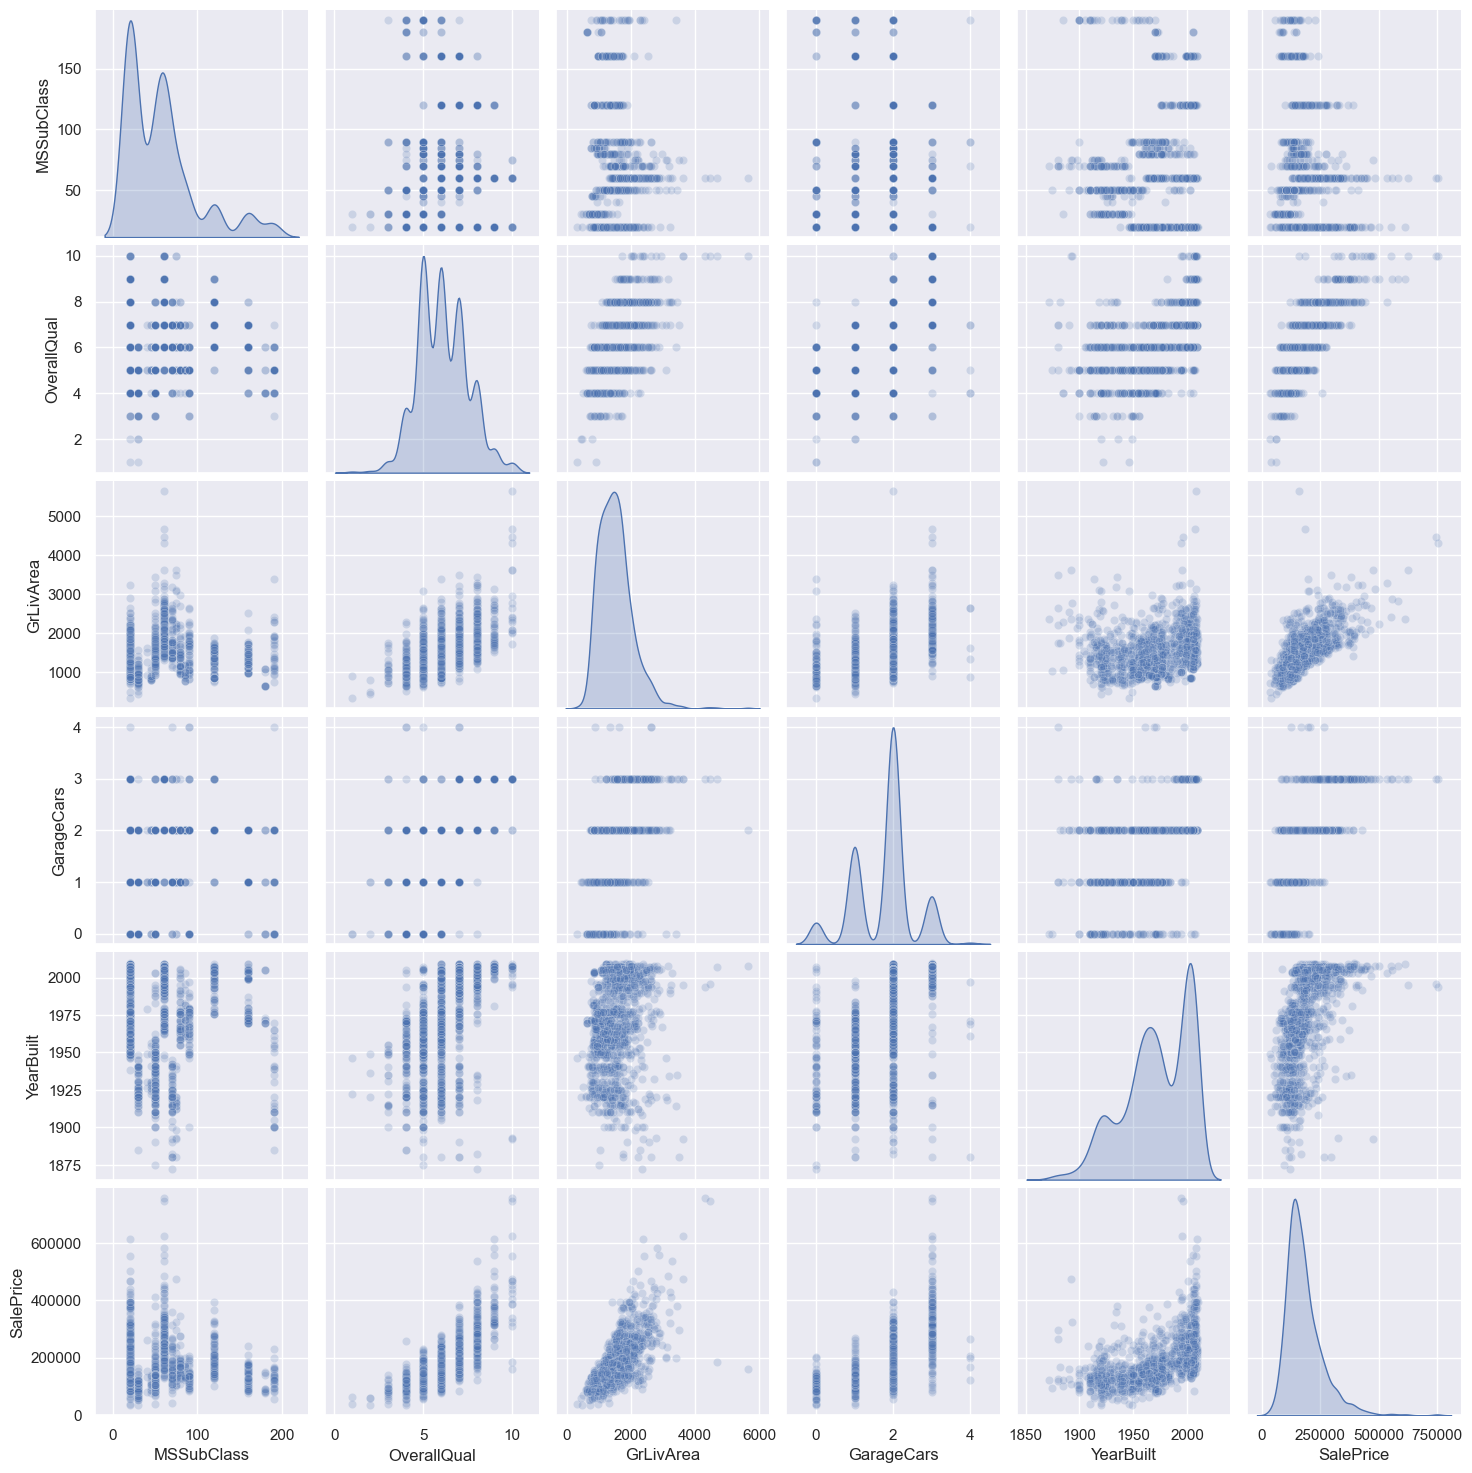

In [298]:
col_name_list_corr = ['MSSubClass', 'MSZoning', 'OverallQual', 'GrLivArea', 'GarageCars','Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'YearBuilt', 'SalePrice']
# pd.plotting.scatter_matrix(df[col_name_list_corr])
sns.pairplot(df[col_name_list_corr], diag_kind='kde', plot_kws={'alpha': 0.2});

<Axes: >

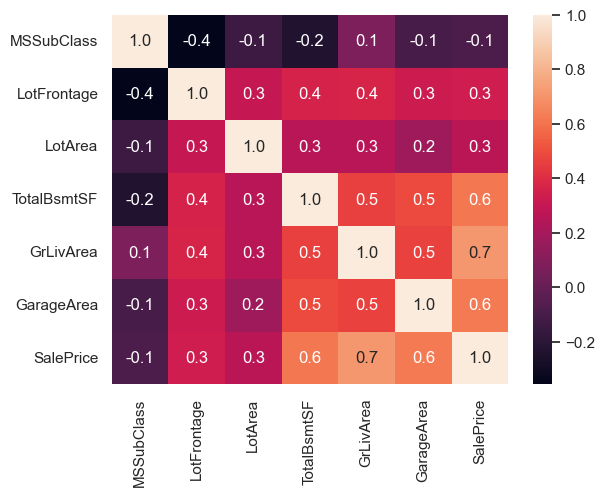

In [299]:
# Построим матрицу корреляций между признаками.
sns.heatmap(df[['MSSubClass', 'LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']].corr(), annot=True, fmt=".1f")

##### 4.d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [300]:
# сделано выше

### 5. Выполните проектирование признаков путем реализации следующих преобразований:

##### 5.a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.

Закодируем все категориальные признаки через one-hot encoding
1. Содержащиеся в переменной 
    col_name_with_categorical_data_to_one_hot_encoding
2. Описывающие подвал, \
    содержащиеся в переменной **bsmt_categorical_col**\
    только записи, удовлетворяющие условию **~bsmt_is_not_exists_cond**
3. Описывающие камин, \
    содержащиеся в переменной **frplc_categorical_col**\
    только записи, удовлетворяющие условию **~fireplaces_is_not_exists_cond**
5. Описывающие гараж 
    содержащиеся в переменной **garage_categorical_col**\
    только записи, удовлетворяющие условию **~garage_is_not_exists_cond**.
6. Описывающие бассейн
    содержащиеся в переменной **pool_categorical_col**\
    только записи, удовлетворяющие условию **~pool_is_not_exists_cond**

4. Предварительно Год постройки гаража GarageYrBlt \
    добавим переменнюу возраст гаража **garage_categorical_col.append(garage_age_col_name + '_cat')**\
    переведем в возраст гаража в годах, относительно даты 2024\
    сделаем из возраста категориальную переменную garage_age_col_name + '_cat'
    закодируем через one-hot encoding переменную возраст гаража  


In [301]:
# df_copy = df.copy()

In [302]:
# Содержащиеся в переменной col_name_with_categorical_data_to_one_hot_encoding
for col in col_name_with_categorical_data_to_one_hot_encoding:
    df = pd.get_dummies(df, columns=[col['name']], prefix=col['name'].replace(' ','_'), drop_first=True)
df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,...,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,1,0,0,0,1,0,1,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,Gd,...,1,0,0,0,1,0,1,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,1,0,0,0,1,0,1,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,1,0,0,0,0,0,1,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,1,0,0,0,1,0,1,0,0,0


In [303]:
# Описывающие подвал, содержащиеся в переменной **bsmt_categorical_col** 
for col in bsmt_categorical_col:
    df = \
        pd.get_dummies(df, columns=[col], prefix=col.replace(' ','_'), drop_first=True)
    df.drop(columns=col + '_' + NO_VALUE_MARKER, inplace=True)
df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,0,0,0,1


In [304]:
# содержащиеся в переменной **frplc_categorical_col** только записи, удовлетворяющие условию **~fireplaces_is_not_exists_cond**
for col in frplc_categorical_col:
    df = \
        pd.get_dummies(df, columns=[col], prefix=col.replace(' ','_'), drop_first=True)
    df.drop(columns=col + '_' + NO_VALUE_MARKER, inplace=True)
df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,1,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,0,1,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,1,0,0,0,1


In [305]:
# содержащиеся в переменной **garage_categorical_col** только записи, удовлетворяющие условию **~garage_is_not_exists_cond**.
for col in garage_categorical_col:
    df = \
        pd.get_dummies(df, columns=[col], prefix=col.replace(' ','_'), drop_first=True)
    df.drop(columns=col + '_' + NO_VALUE_MARKER, inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,0,0,0,0,1,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,0,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,0,0,0,0,1,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,1,0,0,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,0,0,0,0,1,0,0,0,1


In [306]:
# содержащиеся в переменной **pool_categorical_col** только записи, удовлетворяющие условию **~pool_is_not_exists_cond**
for col in pool_categorical_col:
    df = \
        pd.get_dummies(df, columns=[col], prefix=col.replace(' ','_'), drop_first=True)
    df.drop(columns=col + '_' + NO_VALUE_MARKER, inplace=True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_Fa,PoolQC_Gd
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,1,0,0


##### 5.b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [307]:
# Год постройки гаража GarageYrBlt переведем в возраст гаража в годах, относительно 2024
garage_age_col_name = 'GarageAgeBlt'
if garage_age_col_name in df.columns:
    df.drop(columns=garage_age_col_name, inplace=True)
df[garage_age_col_name] = \
    df['GarageYrBlt'].apply(lambda x: 2024 - x)
# print(df[garage_age_col_name].value_counts())

# Возраст переведем в категориальный признак
garage_age_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 70, 90, df[garage_age_col_name].max()]
if garage_age_col_name + '_cat' in df.columns:
    df.drop(garage_age_col_name + '_cat', axis=1, inplace=True)
df[garage_age_col_name + '_cat'] = pd.cut(df[garage_age_col_name], bins=garage_age_bins, labels=False)
df[garage_age_col_name + '_cat'].value_counts().sort_index()
# df.loc[garage_is_not_exists_cond ,[garage_age_col_name + '_cat']]# для объектов с отсутствующим гаражом значение признака NaN
# Далее категори возраста гаража будут закодированы через one-hot encoding

2.0      24
3.0     255
4.0     153
5.0     106
6.0     119
7.0     161
8.0     352
9.0     125
10.0     84
Name: GarageAgeBlt_cat, dtype: int64

In [308]:
# закодируем через one-hot encoding переменную возраст гаража 
df = pd.get_dummies(df, columns=[garage_age_col_name + '_cat'], prefix=(garage_age_col_name + '_cat').replace(' ','_'), drop_first=False)

In [309]:
# Преобразуем месяц и год продажи в срок владения в месяцах OwnershipTerm относительно 2025 * 12
ownership_term_col = 'OwnershipTerm'
if ownership_term_col in df.columns:
    df.drop(columns=ownership_term_col, inplace=True)
df[ownership_term_col] = \
    df[['YrSold', 'MoSold']].apply(lambda x: 2025 * 12 - (x['YrSold'] * 12 + x['MoSold']), axis=1)

In [310]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageAgeBlt_cat_2.0,GarageAgeBlt_cat_3.0,GarageAgeBlt_cat_4.0,GarageAgeBlt_cat_5.0,GarageAgeBlt_cat_6.0,GarageAgeBlt_cat_7.0,GarageAgeBlt_cat_8.0,GarageAgeBlt_cat_9.0,GarageAgeBlt_cat_10.0,OwnershipTerm
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,1,0,0,0,0,0,0,202
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,1,0,0,0,211
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,1,0,0,0,0,0,0,195
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,0,0,0,0,226
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,1,0,0,0,0,0,0,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,1,0,0,0,0,0,0,208
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,1,0,0,0,178
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,0,0,0,1,0,175
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,0,0,0,1,0,176


In [311]:
df.to_csv('./train_result.csv')